# Introduction

TLsim is a quasilumped element eigenfrequency solver.

## Polyexponent basis
TLsim uses a "PolyExponent" decomposition for the transmission lines' phase.

$$\Phi(x) = \sum\limits_{i} \alpha_i e^{\beta_i x}x^{k_i}$$
Here $i$ enumerates the basis elements, and $\alpha_i$ are the coefficients and $\beta_i$ and $k_i$ are what defines the basis elements.
It also supports multi-conductor transmission lines.
For example, there is the default basis function, which yields the following real elements:

In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('..')

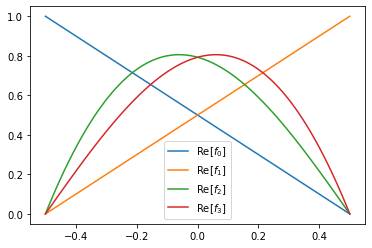

In [2]:
from tlsim2.tl import default_tl_basis
default_basis1 = default_tl_basis(n=1, n_harmonics=1)

fig, axes = plt.subplots(1, 1)
xlist = np.linspace(-0.5, 0.5, 101)
for i, element in enumerate(default_basis1.elements):
    el_y = []
    for x in xlist:
        el_y.append(element.elements[0].eval(x))
    axes.plot(xlist, np.real(el_y), label=f'Re[$f_{i}$]')
axes.legend()

The analytical expression for these functions can be viewed by the string prepesentation:

In [3]:
default_basis1.elements

[TLFieldDistribution with 1 conductors: 0.5   + -1  * x,
 TLFieldDistribution with 1 conductors: 0.5   + 1  * x,
 TLFieldDistribution with 1 conductors: (1.3529177234120247+1.3529177234120278j) * exp(1.5707963267948966j * x)  + (1.3529177234120278-1.3529177234120247j) * exp(-1.5707963267948966j * x)  + (-1.9133145932242195-2.3328705273705865e-15j)   + (3.826629186448439+4.665741054741173e-15j)  * x,
 TLFieldDistribution with 1 conductors: (1.3529177234120247-1.3529177234120278j) * exp(1.5707963267948966j * x)  + (1.3529177234120278+1.3529177234120247j) * exp(-1.5707963267948966j * x)  + (-1.9133145932242195+2.3328705273705865e-15j)   + (-3.826629186448439+4.665741054741173e-15j)  * x]

These functions are designed to be real, but in practice, due to rounding errors, they do have an imaginary part (of the order of 1e-15, which is the rounding error for double-precision floats)
We can add more harmonics to the basis, which would yield the following basis functions:

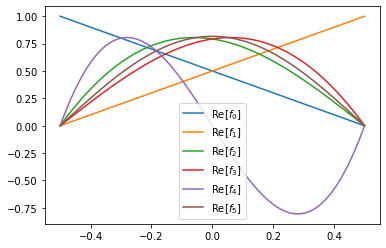

In [4]:
from tlsim2.tl import default_tl_basis
default_basis2 = default_tl_basis(n=1, n_harmonics=2)

fig, axes = plt.subplots(1, 1)
xlist = np.linspace(-0.5, 0.5, 101)
for i, element in enumerate(default_basis2.elements):
    el_y = []
    for x in xlist:
        el_y.append(element.elements[0].eval(x))
    axes.plot(xlist, np.real(el_y), label=f'Re[$f_{i}$]')
axes.legend()

## TL element
To instantise a transmission line, we use the MultiTransmissionLine class. It has as input the per-unit capacitance, inductance and inverse resistance matrices. The resistance is not implemeneted yet. Also it makes in the number of conductors, the length, and the basis.

In [5]:
from tlsim2.tl import MultiTransmissionLine

ll = [[416.120e-9]] # per-unit-length inductance for a 50-ohm TL on cold silicon
cl = [[166.448e-12]] # per-unit-length capacitance for a 50-ohm TL on cold silicon

vp = 1/np.sqrt(np.asarray(cl)*np.asarray(ll))

length = 5e-3

default_basis0 = default_tl_basis(1, 0)
tl = MultiTransmissionLine('TL', n=1, l=length, ll=ll, cl=cl, basis=default_basis0)

The most important property of a quasi-lumped element are its inverse inductance, capacitance and inverse resistance matrices. For our (2-mode, since the basis has just 2 elements) transmission line, we get

In [6]:
li, c, ri = tl.get_element_licri()
print('Inverse inductance matrix:\n', li)
print('Capacitance matrix:\n', c)
print('Resistance:\n', ri)

Inverse inductance matrix:
 [[ 4.80630587e+08 -4.80630587e+08]
 [-4.80630587e+08  4.80630587e+08]]
Capacitance matrix:
 [[2.77413333e-13 1.38706667e-13]
 [1.38706667e-13 2.77413333e-13]]
Resistance:
 [[0. 0.]
 [0. 0.]]


The MultiTransmissionLine we have created has just two terminals. The list of terminals an element has can be accessed through .get_terminal_names():

In [7]:
tl.get_terminal_names()

['i0', 'o0']

The amount of terminals in a MultiTransmissionLine is determined by the 'n' parameter:

In [8]:
ll_coupler = [[476.595, 169.262],
              [169.262, 476.595]] # per-unit-length inductance for two close 50-ohm TLs on cold silicon
cl_coupler = [[166.304, -59.062],
              [-59.062, 166.304]] # per-unit-length capacitance for two close 50-ohm TLs on cold silicon

default_basis2 = default_tl_basis(2, 0)
coupler = MultiTransmissionLine('Coupler', n=2, l=length, ll=ll_coupler, cl=cl_coupler, basis=default_basis2)
coupler.get_terminal_names()

['i0', 'o0', 'i1', 'o1']

In [9]:
li, c, ri = coupler.get_element_licri()
print('Inverse inductance matrix:\n', li)
print('Capacitance matrix:\n', c)
print('Resistance:\n', ri)

Inverse inductance matrix:
 [[ 0.480213   -0.480213   -0.17054693  0.17054693]
 [-0.480213    0.480213    0.17054693 -0.17054693]
 [-0.17054693  0.17054693  0.480213   -0.480213  ]
 [ 0.17054693 -0.17054693 -0.480213    0.480213  ]]
Capacitance matrix:
 [[ 0.27717333  0.13858667 -0.09843667 -0.04921833]
 [ 0.13858667  0.27717333 -0.04921833 -0.09843667]
 [-0.09843667 -0.04921833  0.27717333  0.13858667]
 [-0.04921833 -0.09843667  0.13858667  0.27717333]]
Resistance:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Circuit object

To obtain eigenfrequencies, we must create a circuit out of this tl.

In [10]:
from tlsim2.circuit import Circuit
sys = Circuit()

To add the TL element to the circuit, we need to define the mapping between element terminals and circuit nodes:

In [11]:
sys.add_element(tl, {'i0': 0, 'o0': 1})

If we wish to set the potential of a node to ground, we use the short function:

In [12]:
sys.short(0)

Now we are ready to see the inverse indutance, capacitance and inverse resistance matrices of the full system:

In [13]:
li_sys, c_sys, ri_sys, nodes = sys.get_system_licri()

In [14]:
print('Inverse inductance matrix:\n', li)
print('Capacitance matrix:\n', c)
print('Resistance:\n', c)
print('System node order: ', nodes)

Inverse inductance matrix:
 [[ 0.480213   -0.480213   -0.17054693  0.17054693]
 [-0.480213    0.480213    0.17054693 -0.17054693]
 [-0.17054693  0.17054693  0.480213   -0.480213  ]
 [ 0.17054693 -0.17054693 -0.480213    0.480213  ]]
Capacitance matrix:
 [[ 0.27717333  0.13858667 -0.09843667 -0.04921833]
 [ 0.13858667  0.27717333 -0.04921833 -0.09843667]
 [-0.09843667 -0.04921833  0.27717333  0.13858667]
 [-0.04921833 -0.09843667  0.13858667  0.27717333]]
Resistance:
 [[ 0.27717333  0.13858667 -0.09843667 -0.04921833]
 [ 0.13858667  0.27717333 -0.04921833 -0.09843667]
 [-0.09843667 -0.04921833  0.27717333  0.13858667]
 [-0.04921833 -0.09843667  0.13858667  0.27717333]]
System node order:  [1]


The node order defines the correpondes between row/column id in the matrices to circuit node names.

Finally, we can obtain the eigenfrequencies by reducing the ODE system

$$ \begin{pmatrix} \mathbf{0} & \mathbf{C} \\ \mathbf{1} & \mathbf{0} \end{pmatrix}
   \begin{pmatrix} \dot{\mathbf{\Phi}} \\ \dot{\mathbf{V}} \end{pmatrix} = 
   \begin{pmatrix} \mathbf{L}^{-1} & \mathbf{R}^{-1} \\ \mathbf{0} & \mathbf{1} \end{pmatrix}
   \begin{pmatrix} \mathbf{\Phi} \\ \mathbf{V} \end{pmatrix}$$
   
into the generalized eigenvalue problem 

$$ w \begin{pmatrix} \mathbf{0} & \mathbf{C} \\ \mathbf{1} & \mathbf{0} \end{pmatrix}
   \begin{pmatrix} \mathbf{\Phi} \\ \mathbf{V} \end{pmatrix} = 
   \begin{pmatrix} \mathbf{L}^{-1} & \mathbf{R}^{-1} \\ \mathbf{0} & \mathbf{1} \end{pmatrix}
   \begin{pmatrix} \mathbf{\Phi} \\ \mathbf{V} \end{pmatrix}$$
   
and solving it.

In [15]:
w, v, node_names = sys.compute_system_modes()
print ('Eigenfrequencies: ', w)

Eigenfrequencies:  [0.-4.16238298e+10j 0.+4.16238298e+10j]


The angular frequencies are actually the imaginary parts of these values. 
Moreover, each freqeuncy appears twice -- with positive and negative signs. 
Some modes have zero frequency: that means there is a fixed ratio between some nodes' phases.
To get frequncies in GHz, we divide by $2\pi$ and take only positive-frequency eigenvalues.

In [16]:
frequencies = np.imag(w/(2*np.pi)/1e9)
frequencies = frequencies[frequencies > 0]
frequencies

array([6.62463827])

For a quarter-wavelength resonator the correct frequency would be computed by the formula
$$ f = \frac{1}{4l\sqrt{L_lC_l}}$$

In [17]:
frequency_analytical = vp/(4*length)/1e9
frequency_analytical

array([[6.00788234]])

To get higher precision, we might extend the basis:

In [18]:
tl.set_basis(default_tl_basis(n=1, n_harmonics=2))

li, c, ri = tl.get_element_licri()
print('Inverse inductance matrix:\n', li)
print('Capacitance matrix:\n', c)
print('Resistance:\n', c)

Inverse inductance matrix:
 [[ 4.80630587e+08 -4.80630587e+08  0.00000000e+00  0.00000000e+00
  -4.26885716e-07  0.00000000e+00]
 [-4.80630587e+08  4.80630587e+08  0.00000000e+00  0.00000000e+00
   4.26885716e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.64476517e+09  1.51035000e+09
   6.64344933e+08  1.57257285e+09]
 [ 0.00000000e+00  0.00000000e+00  1.51035000e+09  1.64476517e+09
  -6.64344933e+08  1.57257285e+09]
 [-4.26885716e-07  4.26885716e-07  6.64344933e+08 -6.64344933e+08
   6.57906067e+09  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.57257285e+09  1.57257285e+09
   0.00000000e+00  1.58121125e+09]]
Capacitance matrix:
 [[ 2.77413333e-13  1.38706667e-13  2.29141748e-13  2.05947672e-13
   1.14570874e-13  2.16298289e-13]
 [ 1.38706667e-13  2.77413333e-13  2.05947672e-13  2.29141748e-13
  -1.14570874e-13  2.16298289e-13]
 [ 2.29141748e-13  2.05947672e-13  2.77413333e-13  2.71839357e-13
   2.77999139e-14  2.75897781e-13]
 [ 2.05947672e-13  2.29141748e-13  2.7183

Now there are many more elements, let's see what frequency we get...

In [19]:
w, v, node_names = sys.compute_system_modes()
frequencies = np.imag(w/(2*np.pi))/1e9
frequencies = frequencies[frequencies > 0]
frequencies

array([87.24957035, 46.02663274, 30.27585813,  6.00788234, 18.02444898])

In [20]:
closest_frequency = frequencies[np.argmin(np.abs(frequencies - frequency_analytical))]
closest_frequency - frequency_analytical

array([[3.55271368e-15]])

The error is very low, which might be related to the fact that this basis actually contains precisely the right basis element.

## Creating a circuit element out of a ready circuit
Now that we have created our fancy nice resonator circuit and computed its modes, we can put it into a larger circuit -- leaving only the relevant modes. In this function the relevant modes are chose by a frequency span (in angular units). We choose the span to be up to 10 GHz.

Node 1 of the resonator circuit is now assigned the terminal name 'res_open'.

In [21]:
cutoff_high = 10e9*(2*np.pi)
res = sys.make_element({1: 'res_open'}, cutoff_low = 0, cutoff_high = cutoff_high)
li, c, ri = res.get_element_licri()
print('Inverse inductance matrix:\n', li)
print('Capacitance matrix:\n', c)
print('Resistance:\n', c)

Inverse inductance matrix:
 [[ 4.80630587e+08+0.j -5.98953194e-19+0.j]
 [-5.98953194e-19+0.j  9.91837772e+07+0.j]]
Capacitance matrix:
 [[2.77413333e-13+0.j 5.62694400e-14+0.j]
 [5.62694400e-14+0.j 1.67287725e-14+0.j]]
Resistance:
 [[2.77413333e-13+0.j 5.62694400e-14+0.j]
 [5.62694400e-14+0.j 1.67287725e-14+0.j]]


Now we create a bigger circuit, consisting of this resonator

In [22]:
sys_big = Circuit()
sys_big.add_element(res, {'res_open': 1})


and some lumped elements: a microwave port through a small capacitance.

In [23]:
from tlsim2.lumped import LumpedTwoTerminal

c_c = 1e-16
r = 50

cap = LumpedTwoTerminal(name='C_c', c=c_c)
resistor = LumpedTwoTerminal(name='R', r=r)

sys_big.add_element(cap, {'i': 1, 'o': 2})
sys_big.add_element(resistor, {'i': 2, 'o': 0})

sys_big.short(0)

In [24]:
w, v, node_names = sys_big.compute_system_modes()
frequencies = np.imag(w/(2*np.pi))/1e9
decays = np.real(w/1e9)*2
decays = decays[frequencies > 0]
frequencies = frequencies[frequencies > 0]
frequencies, decays

(array([23.96201531,  6.00716054]), array([1.01204180e-04, 1.71158032e-06]))

The approximate analytical formula for this frequency is 
$$ \gamma = 2C_c^2\omega^3 Z_0 R$$

In [25]:
2 * c_c**2 * (closest_frequency * 2 * np.pi * 1e9)**3*(r * 50)/(np.pi/2)/1e9

1.7121980139125029e-06

In [26]:
sys_big.get_system_licri()

(array([[ 4.80630587e+08+0.j,  0.00000000e+00+0.j, -5.98953194e-19+0.j],
        [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j],
        [-5.98953194e-19+0.j,  0.00000000e+00+0.j,  9.91837772e+07+0.j]]),
 array([[ 2.77513333e-13+0.j, -1.00000000e-16+0.j,  5.62694400e-14+0.j],
        [-1.00000000e-16+0.j,  1.00000000e-16+0.j,  0.00000000e+00+0.j],
        [ 5.62694400e-14+0.j,  0.00000000e+00+0.j,  1.67287725e-14+0.j]]),
 array([[0.  +0.j, 0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0.02+0.j, 0.  +0.j],
        [0.  +0.j, 0.  +0.j, 0.  +0.j]]),
 [1, 2, 'None_0_disconnected'])

# Splitting circuit elements

In [27]:
from tlsim2.linear import SplitElementPart
cii = SplitElementPart('Cii', cap, 'i', 'i')
cio = SplitElementPart('Cio', cap, 'i', 'o')
coo = SplitElementPart('Coo', cap, 'o', 'o')

The cii and coo-parts correspond to the diagonal parts, while cio-- to the off-digonal parts 

In [28]:
li_ii, c_ii, ri_ii = cii.get_element_licri()
li_io, c_io, ri_io = cio.get_element_licri()
li_oo, c_oo, ri_oo = coo.get_element_licri()
c_ii, c_io, c_oo

(array([[1.e-16]]),
 array([[ 0.e+00, -1.e-16],
        [-1.e-16,  0.e+00]]),
 array([[1.e-16]]))

In [29]:
# default_basis2 = default_tl_basis(2, 2)
# default_basis2

# Splitting two coupled transmission lines
TODO: tidy this up to give it more of an educational aspect

## Testing splitting on a resonator-purcell-system
Trying 'autosplit'. Autosplit knows which elements need to be split later, and how they should be split.

In [47]:
from tlsim2.circuit import Circuit
sys_rpf = Circuit('sys_rpf')

t = 3
t2 = 2

rp_length = 0.0002
pf_length = 0.0004
rs_length = 0.001
ro_length = 0.003
ps_length = 0.001
pm_length = 0.0015
po_length = 0.002

r_cap = 10e-15
f_res = 50

default_basis2 = default_tl_basis(2, t2)
default_basis = default_tl_basis(1, t)

rp = MultiTransmissionLine('rp', n=2, l=rp_length, ll=np.asarray(ll_coupler)*1e-9, 
                           cl=np.asarray(cl_coupler)*1e-12, basis=default_basis2, coupler_hint=True)
# rp = MultiTransmissionLine('rp', n=1, l=rp_length, ll=ll, cl=cl, basis=default_basis)

pf = MultiTransmissionLine('pf', n=2, l=pf_length, ll=np.asarray(ll_coupler)*1e-9, 
                           cl=np.asarray(cl_coupler)*1e-12, basis=default_basis2, coupler_hint=True)

rs = MultiTransmissionLine('rs', n=1, l=rs_length, ll=ll, cl=cl, basis=default_basis)
ro = MultiTransmissionLine('ro', n=1, l=ro_length, ll=ll, cl=cl, basis=default_basis)
ps = MultiTransmissionLine('ps', n=1, l=ps_length, ll=ll, cl=cl, basis=default_basis)
pm = MultiTransmissionLine('pm', n=1, l=pm_length, ll=ll, cl=cl, basis=default_basis)
po = MultiTransmissionLine('po', n=1, l=ps_length, ll=ll, cl=cl, basis=default_basis)

cap = LumpedTwoTerminal(name='c', c=r_cap)
p1 = LumpedTwoTerminal(name='p1', r=f_res)
p2 = LumpedTwoTerminal(name='p2', r=f_res)

sys_rpf.add_element(pf, {'i0': 1, 'o0': 2, 'i1': 3, 'o1': 4})
sys_rpf.add_element(p1, {'i': 1, 'o': 0})
sys_rpf.add_element(p2, {'i': 2, 'o': 0}) # notch-port-coupled resonator

sys_rpf.add_element(ps, {'i0': 3, 'o0': 0})
sys_rpf.add_element(pm, {'i0': 4, 'o0': 5})
sys_rpf.add_element(rp, {'i0': 5, 'o0': 6, 'i1': 7, 'o1': 8})
# sys_rpf.add_element(rp, {'i0': 5, 'o0': 6})
sys_rpf.add_element(po, {'i0': 6, 'o0': 9})

sys_rpf.add_element(ro, {'i0': 7, 'o0': 10})
sys_rpf.add_element(rs, {'i0': 8, 'o0': 0})

sys_rpf.add_element(cap, {'i': 10, 'o': 0})

sys_rpf.short(0)

w_rpf, v_rpf, node_names_rpf = sys_rpf.compute_system_modes()

frequencies_rpf = np.imag(w_rpf/(2*np.pi))/1e9
decays_rpf = np.real(w_rpf/1e9)*2
mask_rpf = frequencies_rpf > 0
decays_rpf = decays_rpf[mask_rpf]
frequencies_rpf = frequencies_rpf[mask_rpf]
# frequencies, decays
sorting = np.argsort(frequencies_rpf)
frequencies_rpf[sorting][:10], decays_rpf[sorting][:10]

(array([2.69050642e-13, 1.36329364e-12, 6.97726043e+00, 7.27241874e+00,
        2.10776558e+01, 2.19278595e+01, 3.50102445e+01, 3.65106682e+01,
        4.90552120e+01, 5.10106030e+01]),
 array([2.02937155e+03, 1.34341089e+04, 1.04549587e-02, 9.25299515e-02,
        6.14144019e-02, 6.54496411e-01, 2.26169760e-01, 1.75247763e+00,
        2.11519033e-01, 3.04632341e+00]))

In [48]:
split_system = sys_rpf.autosplit()
resonator = split_system.find_subsystem_name_by_element('rs')
split_system.rename_element(resonator, 'resonator')
purcell = split_system.find_subsystem_name_by_element('ps')
split_system.rename_element(purcell, 'Purcell-filter')
feedline = split_system.find_subsystem_name_by_element('p1')
split_system.rename_element(feedline, 'feedline')

In [49]:
w_split, v_split, node_names_split = split_system.compute_system_modes()

resonator_modes_mask = np.real(split_system.element_epr([split_system.elements['resonator']]))>0.5
np.imag(w_split[resonator_modes_mask]/(2*np.pi))/1e9
# frequencies_split = np.imag(w_split/(2*np.pi))/1e9
# decays_split = np.real(w_split/1e9)*2
# mask_split = frequencies_split > 0
# decays_split = decays_split[mask_split]
# frequencies_split = frequencies_split[mask_split]

# sorting = np.argsort(frequencies_split)
# frequencies_split[sorting][:10], decays_split[sorting][:10]

array([ 1.34935493e+03, -1.34935493e+03,  9.64142277e+02, -9.64142277e+02,
        6.10776158e+02, -6.10776158e+02,  3.19962886e+02, -3.19962886e+02,
        8.28470567e+01, -8.28470567e+01,  2.35544902e+01, -2.35544902e+01,
        3.01151779e-15,  6.97748685e+00, -6.97748685e+00])

## TODOs:
- add drawing of the circuit graph (using pygraphviz, unfortunately?)
- track if a lower-lying element is modified and recaluclate the modes of upper layers

In [34]:
split_system.connections

{frozenset({('pf', frozenset({3, 4, 5, 6, 9})),
            ('pf', frozenset({1, 2}))}): {'i0': 1, 'o0': 2, 'i1': 3, 'o1': 4},
 frozenset({('rp', frozenset({7, 8, 10})),
            ('rp', frozenset({3, 4, 5, 6, 9}))}): {'i0': 5,
  'o0': 6,
  'i1': 7,
  'o1': 8},
 ('sys_rpf', frozenset({1, 2})): {1: 1, 2: 2},
 'resonator': {7: 7, 8: 8},
 'Purcell-filter': {3: 3, 4: 4, 5: 5, 6: 6}}

In [35]:
# sorted(1j*split_system.elements[('sys_rpf', frozenset({1, 2}))].circuit.w/(2*np.pi*1e9))
# sorted((1j*split_system.elements[('sys_rpf', frozenset({3, 4, 5, 6, 9}))].circuit.w/(2*np.pi*1e9)))
sorted((1j*split_system.elements[('sys_rpf', frozenset({7, 8, 10}))].circuit.w/(2*np.pi*1e9)))
# split_system.elements

KeyError: ('sys_rpf', frozenset({8, 10, 7}))

In [ ]:
split_system.elements[('sys_rpf', frozenset({7, 8, 10}))].circuit.elements['rs'].basis

In [ ]:
split_system.elements[('sys_rpf', frozenset({7, 8, 10}))].circuit.connections_circuit()

In [ ]:
sys_rpf.connections_circuit()

In [ ]:
sys_rpf.elements['pf'].split(splitting={'pf{1, 2}': ['i0', 'o0'], 'pf{3, 4, 5, 6, 9}': ['i1', 'o1']})

In [ ]:
li, c,ri, elnames = sys_rpf.get_system_licri()
plt.pcolormesh(np.real(li))
plt.xticks(np.arange(len(elnames))+0.5)
plt.gca().set_xticklabels(elnames, rotation=90)
plt.yticks(np.arange(len(elnames))+0.5)
plt.gca().set_yticklabels(elnames, rotation=0)
plt.colorbar()

In [ ]:
# v[:, 10]
# res_epr = sys_rpf.element_epr([ro, rp, rs], v)
v_pos = v[:, mask]

p_epr = np.real(sys_rpf.element_epr([ps, rp, pm, pf, po], v_pos))
res_epr = np.real(sys_rpf.element_epr([rs, rp, ro], v_pos))
max_mode_id = np.argsort(p_epr)
np.round(p_epr[max_mode_id], 3), np.round(res_epr[max_mode_id], 3), np.round(frequencies[max_mode_id], 3)

### Now with splitting:

In [ ]:
from tlsim2.circuit import Circuit
sys_rpf_split = Circuit(name='rpf')

sys_r = Circuit(name='r')
sys_p = Circuit(name='p')
sys_f = Circuit(name='f')

t = 1
t2 = 0

rp_length = 0.0002
pf_length = 0.0004
rs_length = 0.001
ro_length = 0.003
ps_length = 0.001
pm_length = 0.0015
po_length = 0.002

r_cap = 10e-15
f_res = 50

default_basis2 = default_tl_basis(2, t2)
default_basis = default_tl_basis(1, t)

rp = MultiTransmissionLine('rp', n=2, l=rp_length, ll=np.asarray(ll_coupler)*1e-9, 
                           cl=np.asarray(cl_coupler)*1e-12, basis=default_basis2)
rp_r, rp_p, rp_rp = rp.split({'rp_r':['i1', 'o1'], 'rp_p':['i0', 'o0']})
# rp = MultiTransmissionLine('rp', n=1, l=rp_length, ll=ll, cl=cl, basis=default_basis)

pf = MultiTransmissionLine('pf', n=2, l=pf_length, ll=np.asarray(ll_coupler)*1e-9, 
                           cl=np.asarray(cl_coupler)*1e-12, basis=default_basis2)
pf_p, pf_f, pf_pf = pf.split({'pf_p':['i1', 'o1'], 'pf_f':['i0', 'o0']})

rs = MultiTransmissionLine('rs', n=1, l=rs_length, ll=ll, cl=cl, basis=default_basis)
ro = MultiTransmissionLine('ro', n=1, l=ro_length, ll=ll, cl=cl, basis=default_basis)
ps = MultiTransmissionLine('ps', n=1, l=ps_length, ll=ll, cl=cl, basis=default_basis)
pm = MultiTransmissionLine('pm', n=1, l=pm_length, ll=ll, cl=cl, basis=default_basis)
po = MultiTransmissionLine('po', n=1, l=ps_length, ll=ll, cl=cl, basis=default_basis)

cap = LumpedTwoTerminal(name='c', c=r_cap)
p1 = LumpedTwoTerminal(name='p1', r=f_res)
p2 = LumpedTwoTerminal(name='p2', r=f_res)

sys_f.add_element(pf_f, {'i0': 1, 'o0': 2})
sys_f.add_element(p1, {'i': 1, 'o': 0})
sys_f.add_element(p2, {'i': 2, 'o': 0}) # notch-port-coupled resonator

sys_p.add_element(ps, {'i0': 3, 'o0': 0})
sys_p.add_element(pf_p, {'i1': 3, 'o1': 4})
sys_p.add_element(pm, {'i0': 4, 'o0': 5})
sys_p.add_element(rp_p, {'i0': 5, 'o0': 6})
sys_p.add_element(po, {'i0': 6, 'o0': 9})

sys_r.add_element(ro, {'i0': 7, 'o0': 10})
sys_r.add_element(rp_r, {'i1': 7, 'o1': 8})
sys_r.add_element(rs, {'i0': 8, 'o0': 0})
sys_r.add_element(cap, {'i': 10, 'o': 0})

sys_r.short(0)
sys_p.short(0)
sys_f.short(0)

w_r, v_r, node_names_r = sys_r.compute_system_modes()
w_p, v_p, node_names_p = sys_p.compute_system_modes()
w_f, v_f, node_names_f = sys_f.compute_system_modes()

sys_rpf_mod = Circuit() # in principle, all connections by now are established, all that need 
                        # to be done now is reconcillation.
sys_f_element = sys_f.make_element({1: 1, 
                                    2: 2, 
#                                     'pf_f_int0_disconnected': 'pf_int0', 
#                                     'pf_f_int1_disconnected': 'pf_int1'
                                   },
                                  cutoff_high=1e11
                                  )
sys_p_element = sys_p.make_element({3: 3, 
                                    4: 4, 
                                    5: 5, 
                                    6: 6,
#                                     'pf_p_int2_disconnected': 'pf_int2', 
#                                     'pf_p_int3_disconnected': 'pf_int3',
#                                     'rp_p_int0_disconnected': 'rp_int0',
#                                     'rp_p_int1_disconnected': 'rp_int1'
                                   },
                                  cutoff_high=1e11
                                  )
sys_r_element = sys_r.make_element({7: 7,
                                    8: 8,
#                                     'rp_r_int2_disconnected': 'rp_int2',
#                                     'rp_r_int3_disconnected': 'rp_int3'
                                   },
                                  cutoff_high=1e11
                                  )

# sys_rpf_mod.add_element(sys_f_element, {e: e for e in sys_f_element.get_terminal_names()}) # make_element_from_split <- should traverse the split element 
#                                               # and add the elements that need to be reconciled
# sys_rpf_mod.add_element(sys_p_element, {e: e for e in sys_p_element.get_terminal_names()})
# sys_rpf_mod.add_element(sys_r_element, {e: e for e in sys_r_element.get_terminal_names()})
sys_rpf_mod.add_element(sys_f_element, {1:1, 2:2})
sys_rpf_mod.add_element(sys_p_element, {3:3, 4:4, 5:5, 6:6})
sys_rpf_mod.add_element(sys_r_element, {7:7, 8:8})

sys_rpf_mod.add_element(rp_rp, {'i0': 5, 'o0': 6, 'i1': 7, 'o1': 8, 
#                                 'int0': 'rp_int0', 'int1': 'rp_int1',
#                                 'int2': 'rp_int2', 'int3': 'rp_int3'
                               })
sys_rpf_mod.add_element(pf_pf, {'i0': 1, 'o0': 2, 'i1': 3, 'o1': 4, 
#                                 'int0': 'pf_int0', 'int1': 'pf_int1',
#                                 'int2': 'pf_int2', 'int3': 'pf_int3'
                               })

w_rpf, v_rpf, node_names_rpf = sys_rpf_mod.compute_system_modes()

frequencies_r = np.imag(w_r/(2*np.pi))/1e9
decays_r = np.real(w_r/1e9)*2
mask_r = frequencies_r > 0
decays_r = decays_r[mask_r]
frequencies_r = frequencies_r[mask_r]

frequencies_p = np.imag(w_p/(2*np.pi))/1e9
decays_p = np.real(w_p/1e9)*2
mask_p = frequencies_p > 0
decays_p = decays_p[mask_p]
frequencies_p = frequencies_p[mask_p]

frequencies_rpf = np.imag(w_rpf/(2*np.pi))/1e9
decays_rpf = np.real(w_rpf/1e9)*2
mask_rpf = frequencies_rpf > 0
decays_rpf = decays_rpf[mask_rpf]
frequencies_rpf = frequencies_rpf[mask_rpf]

np.round(frequencies_r, 3), np.round(decays_r, 3), np.round(frequencies_p, 3), np.round(decays_p, 3),\
np.round(frequencies_rpf, 3), np.round(decays_rpf, 3)

In [ ]:
node_names_r

In [ ]:
np.imag(sys_r_element.circuit.w)/(2*np.pi*1e9)

In [ ]:
sys_r_element.get_terminal_names()

In [ ]:
sys_rpf_mod.connections

In [ ]:
li, c, ri, node_names = sys_rpf_mod.get_system_licri()
plt.pcolormesh(np.real(li))
node_names

In [ ]:
rp_rp.get_terminal_names()

In [ ]:
node_names_r, node_names_p, node_names_f

# Nonlinearity

$$ \hat{V} =  $$

In [ ]:
coupler.get_element_licri(), coupler.get_terminal_names()
coupler.set_basis(default_tl_basis(n=2, n_harmonics=2))

In [ ]:
li, c, ri = coupler.get_element_licri()
plt.pcolormesh(np.log10(np.abs(li)))

In [ ]:
coupler.get_terminal_names()